![title](./deep.png)

## IMPORT LIBRAIRIES

In [1]:
import numpy as np  #
import pandas as pd #
import random as rn #
import os #
import matplotlib.pyplot as plt #
import seaborn as sns #
#pwd
import cv2                  
from tqdm import tqdm #
from random import shuffle #
from zipfile import ZipFile#
from PIL import Image #
from sklearn.metrics import confusion_matrix,classification_report


In [4]:
# On va lister nos données dans notre répétoire où se trouve tous les fichiers de nos datas 
print(os.listdir('./Input/PAYS'))

['USA', 'Luxembourg', '.DS_Store', 'Belgique', 'France', 'Espagne']


In [5]:
# on va créer deux listes vides pour nos variables de training X et Y
X=[]
y=[]
# Ensuite pour la taille on prends 100
IMG_SIZE=100

#On va mettre les liens de nos fichiers images 
Belgique='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Belgique'
Espagne='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Espagne'
France='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/France'
Luxembourg='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Luxembourg'
#Monaco='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/Monaco'
USA='/Users/aristotemutombo/Desktop/DeeplearningProjet/Input/PAYS/USA'

# On va créer une boucle pour assigner les images et les types de pays
def assign_label(img,pays_type):
    return pays_type

# On va décharger nos datas avec CV2  
def make_train_data(pays_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,pays_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        y.append(str(label))

make_train_data('Belgique',Belgique)

make_train_data('Espagne',Espagne)

make_train_data('France',France)

make_train_data('Luxembourg',Luxembourg)

make_train_data('USA',USA)

100%|██████████| 1000/1000 [00:06<00:00, 156.20it/s]


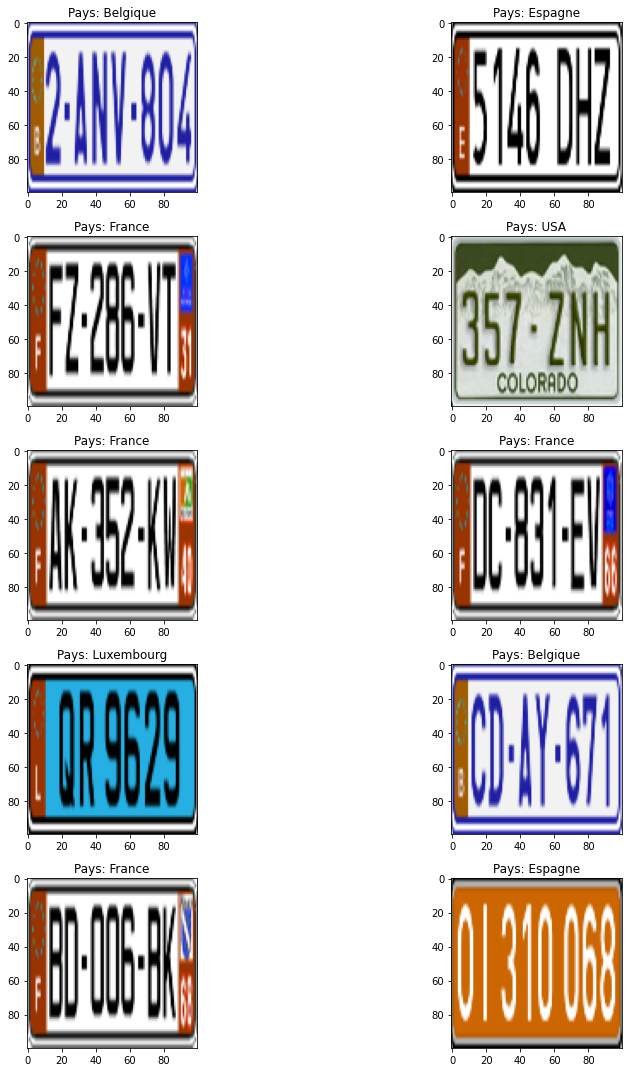

In [6]:
# on va afficher nos données d'images
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Pays: '+y[l])       
plt.tight_layout()


In [7]:
# On rémoderer nos images pour que notr modèle s'adapte
X=np.array(X).reshape(-1,100,100,3)/255.0

In [8]:
categories = ['Belgique', 'Espagne', 'France', 'Luxembourg', 'USA']

/Users/aristotemutombo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


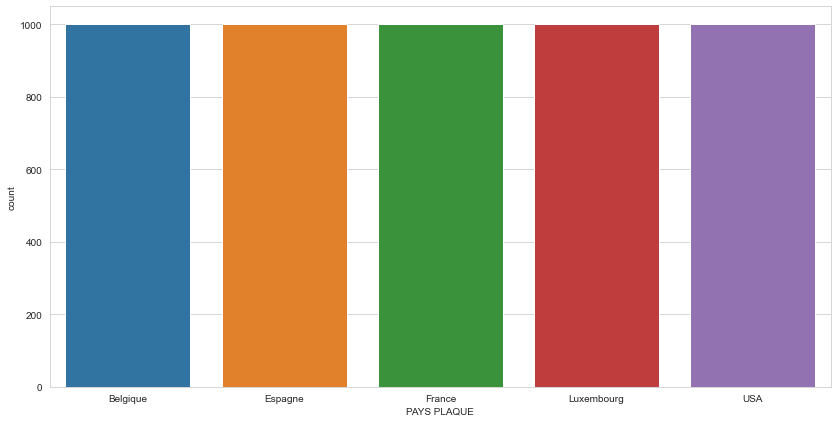

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
fig=sns.countplot(y)
fig.set(xticks=range(len(categories)), xticklabels=[i for i in categories])
plt.xlabel('PAYS PLAQUE')
plt.show()

## OneHotEncoding

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Optimisation des codes :
#y = np.array(y)
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)
#from tensorflow.keras.utils import to_categorical
#y = to_categorical(y)
# Problème rencontrer : lorsuq'on a voulu transformer notre variable prédict y en catégorie :
#  ValueError: invalid literal for int() with base 10: '<s>' il fallait d'abord labeliser la variable y en convertisant la matrice name belgique en 1 et ...ent
# suite il fallait fit les variables qui étaient en l'interieur de sorte en les transformer en matrice
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

## Split Data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

## Modelisation

In [12]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100,100,3)))
#On utiise la fonction d'activation relu car il se trouve à l'intérieur du neurone 
#qui prendra comme entrées la somme linéaire des valeurs d'entrée multipliée par leurs poids associés, et qui donnera la valeur de sortie 
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))
# On utilise la fonction Relu : lorsque les entrées sont normalisées (échelle entre 0 et 1),
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))

#Le Dropout est une technique de régularisation qui permet d'éviter le surapprentissage. 
#Il consiste simplement à désactiver un certain taux de neurones aléatoires à chaque étape de propagation et rétropropagation. De cette façon, 
#tous les neurones évoluent di􏰃éremment, ce qui empêche le surapprentissage des données par le réseau de neurones.
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))


In [14]:
epochs=7 # un epoch correspond à un apprentissage sur toutes les données, plus ce nombre est grand plus on devrait obtenir une bonne précision, mais bien sur plus c'est long
batch_size=128
from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)


## Data Augmentation pour prevenir le problème d'overfitting

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

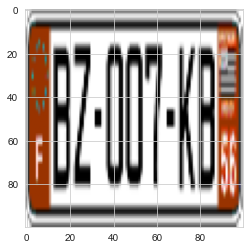

In [38]:
# on prends des images aléatoires pour pourvoir la transformation 
plt.imshow(datagen.random_transform(x_train[11]))
plt.imshow(x_train[11])

In [14]:
## On va 
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

## TENSORBOARD 

## Creating the Tensorboard Callback

TensorBoard est un outil de visualisation fourni avec TensorFlow.

Cette fonction de rappel enregistre les événements pour TensorBoard, y compris.. :
* Résumé des métriques
* Visualisation du graphique de formation
* Histogrammes d'activation
* Profilage échantillonné

Si vous avez installé TensorFlow avec pip, vous devriez pouvoir
de lancer TensorBoard à partir de la ligne de commande :

```sh
tensorboard --logdir=chemin_vers_vos_logs
```

Vous pouvez trouver plus d'informations sur TensorBoard
[ici] (https://www.tensorflow.org/tensorboard/).

    Arguments :
        log_dir : le chemin du répertoire dans lequel enregistrer les fichiers journaux qui seront
          être analysés par TensorBoard.
        histogram_freq : fréquence (en époques) à laquelle calculer les histogrammes d'activation et de poids pour les couches de TensorBoard.
          d'activation et de poids pour les couches du modèle. Si elle est définie à 0, les histogrammes
          ne seront pas calculés. Les données de validation (ou fractionnées) doivent être spécifiées pour les
          visualisations d'histogrammes.
        write_graph : si le graphique doit être visualisé dans TensorBoard. Le fichier journal
          peut devenir assez gros lorsque write_graph est défini sur True.
        write_images : si l'on veut écrire les poids du modèle pour les visualiser en tant qu'image dans
          TensorBoard.
        update_freq : `'batch'` ou `'epoch'` ou integer. Lorsque vous utilisez `'batch'`,
          écrit les pertes et les métriques dans TensorBoard après chaque lot. Il en va de même pour
          s'applique pour `'epoch'`. Si vous utilisez un nombre entier, disons `1000`, le
          callback écrira les mesures et les pertes dans TensorBoard tous les 1000 échantillons.
          échantillons. Notez qu'écrire trop fréquemment sur TensorBoard peut ralentir
          votre formation.
        profile_batch : Profile le lot pour échantillonner les caractéristiques de calcul. Par
          Par défaut, il profile le deuxième lot. Définissez profile_batch=0 pour
          désactiver le profilage. Doit être exécuté en mode TensorFlow eager.
        embeddings_freq : fréquence (en epochs) à laquelle les couches d'intégration seront
          seront visualisées. Si la valeur est 0, les couches d'intégration ne seront pas visualisées.
       TensorBoard est un outil de visualisation fourni avec TensorFlow.


In [16]:
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard

In [17]:
datetime.now().strftime("%Y-%m-%d--%H%M")

'2021-10-20--1549'

In [18]:

# MACOS/LINUX: Use "logs\fit"

log_directory = "logs//fit"

# OPTIONAL: ADD A TIMESTAMP FOR UNIQUE FOLDER
# timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
# log_directory = log_directory + '\\' + timestamp


board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [19]:
x_train.shape

(4000, 100, 100, 3)

In [22]:

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] //128,callbacks=[red_lr,board])# verbose :  vous dites simplement comment vous voulez «voir» la progression de l'entraînement pour chaque époque.
# On arrête notre entraîment en 7 epochs puisque notre niveau de precision est important 

Epoch 1/7
31/31 [==============================] - 69s 2s/step - loss: 0.2250 - accuracy: 0.9323 - val_loss: 0.2083 - val_accuracy: 0.9400
Epoch 2/7
31/31 [==============================] - 65s 2s/step - loss: 0.1269 - accuracy: 0.9626 - val_loss: 0.1378 - val_accuracy: 0.9710
Epoch 3/7
31/31 [==============================] - 62s 2s/step - loss: 0.0974 - accuracy: 0.9716 - val_loss: 0.2120 - val_accuracy: 0.9620
Epoch 4/7
31/31 [==============================] - 82s 3s/step - loss: 0.0736 - accuracy: 0.9806 - val_loss: 0.0929 - val_accuracy: 0.9740
Epoch 5/7
31/31 [==============================] - 64s 2s/step - loss: 0.0846 - accuracy: 0.9762 - val_loss: 0.1279 - val_accuracy: 0.9760
Epoch 6/7
31/31 [==============================] - 66s 2s/step - loss: 0.0786 - accuracy: 0.9755 - val_loss: 0.0850 - val_accuracy: 0.9690
Epoch 7/7
31/31 [==============================] - 74s 2s/step - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0701 - val_accuracy: 0.9810


In [ ]:
## Exécution par la ligne de commande

In [23]:
print(log_directory)

logs//fit


In [24]:
pwd

'/Users/aristotemutombo/Desktop/DeeplearningProjet'

### Utilisez cd sur votre ligne de commande pour changer le répertoire en fonction du chemin d'accès au fichier indiqué par pwd ou de l'emplacement actuel de votre fichier .py.
### Ensuite, exécutez ce code à partir de votre ligne de commande ou de votre terminal.

In [ ]:
tensorboard --logdir logs/fit 

## visualisons le fonctionnement de notre modèle

## Visualisation de notre fonction Loss

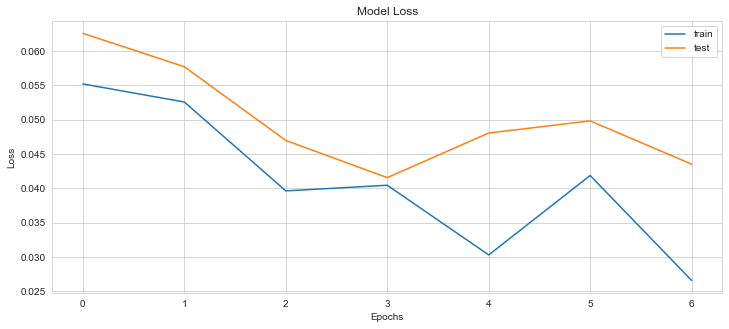

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Visualisation de notre fonction d'Accuracy

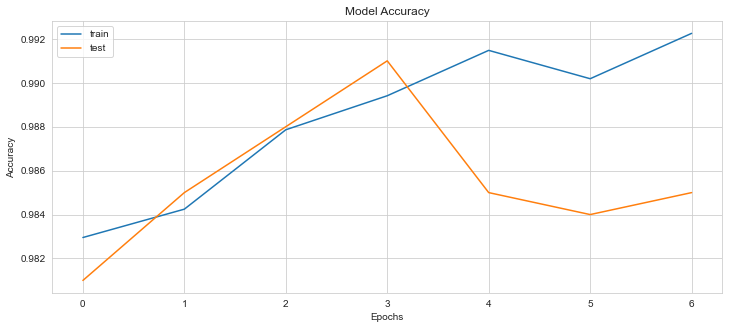

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


## Prédiction

In [ ]:
predictions=model.predict(x_test)

## Classification Report and Matrix de confusion

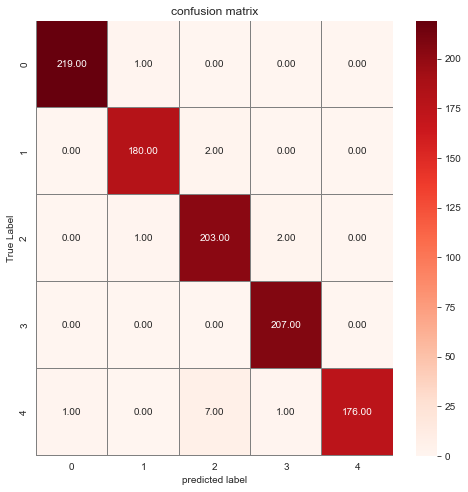

In [60]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1) # Les vrais valeurs de photo 0 à 4 pour chaque pays
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()


In [61]:
Y_pred
Y_pred_classes
target_names = ['Belgique', 'Espagne', 'France', 'Luxembourg', 'USA']
print(classification_report(Y_true, Y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

    Belgique       1.00      1.00      1.00       220
     Espagne       0.99      0.99      0.99       182
      France       0.96      0.99      0.97       206
  Luxembourg       0.99      1.00      0.99       207
         USA       1.00      0.95      0.98       185

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.98      0.98      1000



## Analyse The predictions

In [62]:
preds=model.predict(x_test)

In [63]:
predictions=np.argmax(preds,axis=1)

In [64]:
correct_class=[]
incorrect_class=[]
i=0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==predictions[i]):
        correct_class.append(i)
    if(len(correct_class)==8):
        break

In [65]:
i=0
for i in range(len(y_test)):
    
    if (np.argmax(y_test[i])!=predictions[i]):
        
        incorrect_class.append(i)
    if (len(incorrect_class)==8):
        break

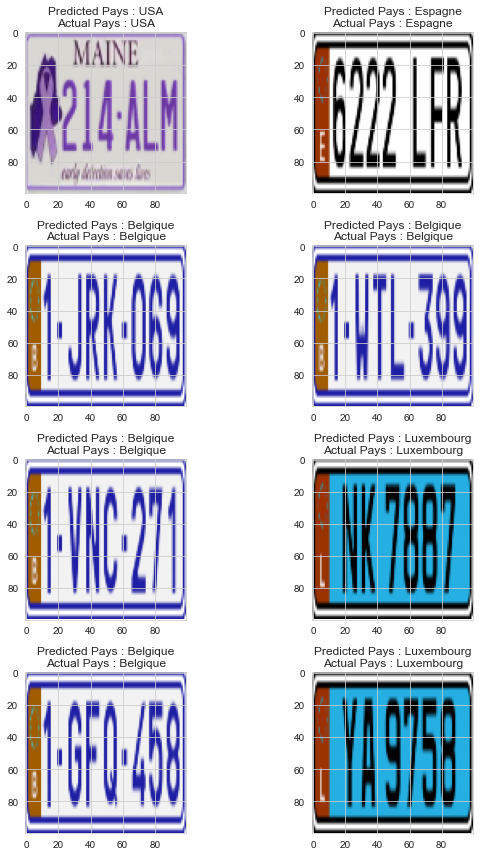

In [66]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(12,12)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[correct_class[count]])
        ax[i,j].set_title("Predicted Pays : "+ categories[predictions[correct_class[count]]] +"\n"+"Actual Pays : "+ categories[np.argmax(y_test[correct_class[count]])])
        plt.tight_layout()
        count+=1


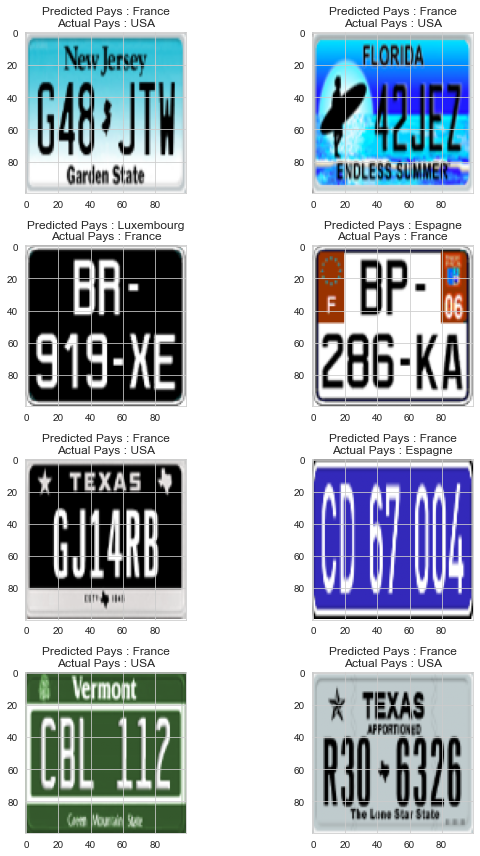

In [67]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(12,12)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(x_test[incorrect_class[count]])
        ax[i,j].set_title("Predicted Pays : " + categories[predictions[incorrect_class[count]]] + "\n"+"Actual Pays : " +categories[np.argmax(y_test[incorrect_class[count]])])
        plt.tight_layout()
        count+=1
